### **Simple Linear regression**
- In this notebook I have practised Single simple Linear Regression Algorithm. 
- The dataset has only 2 features x & y.
- The reason I have choosed this dataset is to get the knowledge about handling the outliers and visualizing the results.

In [2]:
import pandas as pd 

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv(r"C:\Users\Karth\Downloads\Machine learning\Datasets\Linear Regression - Sheet1.csv")
df.head()

,X,Y
0,37.454012,87.648735
1,95.071431,205.854698
2,73.199394,126.230760
3,59.865848,121.413444
4,15.601864,53.658303


In [5]:
df.shape

(128, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       128 non-null    float64
 1   Y       128 non-null    float64
dtypes: float64(2)
memory usage: 2.1 KB


In [7]:
df.describe()

,X,Y
count,128.000000,128.000000
mean,48.217645,94.137714
std,29.861721,49.657272
min,0.552212,6.757291
25%,19.943426,46.328995
50%,48.300526,92.810726
75%,77.104297,138.774430
max,98.688694,205.854698


**Data Cleaning**

In [8]:
df.isnull().sum()

X    0
Y    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

**Visualization**

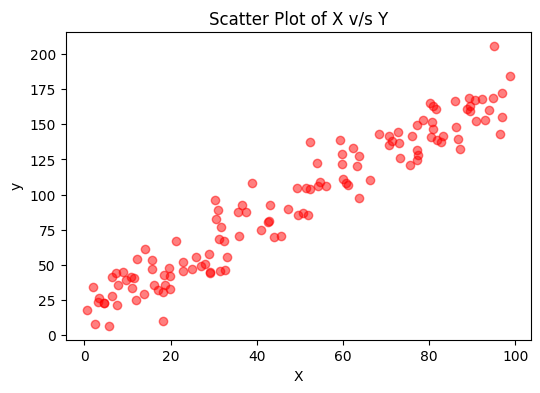

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6,4))
plt.scatter(df[['X']], df['Y'], color='red', alpha= 0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of X v/s Y')
plt.show()


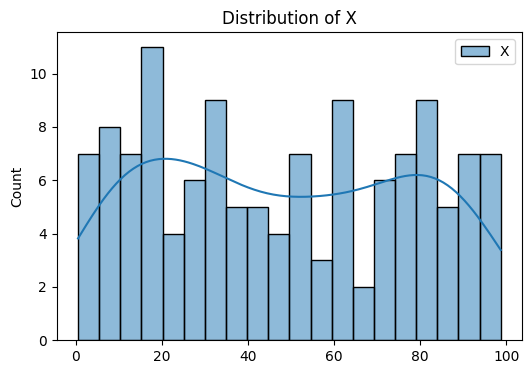

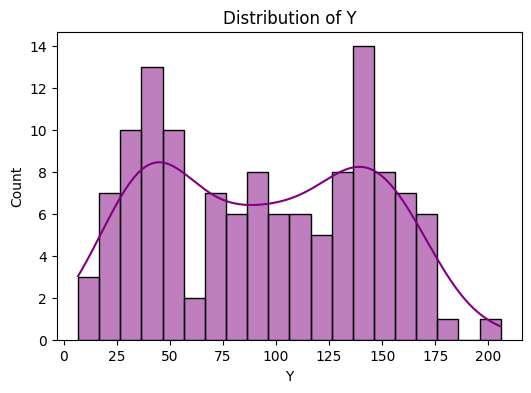

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df[['X']], kde= True, bins= 20, color= 'purple')
plt.title('Distribution of X')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Y'], kde= True, bins=20, color= 'purple')
plt.title('Distribution of Y')
plt.show()

**Model Building**

In [12]:
from sklearn.linear_model import LinearRegression

X= df[['X']]
y= df['Y']

model= LinearRegression()
model.fit(X,y)



LinearRegression()

**Get Parameters m and c then calculate the equation**

In [13]:
print(f"slope (m): {model.coef_[0]}")
print(f"Intercept (c): {model.intercept_}")
print(f"Equation (y): {model.coef_[0]:.2f} *  x + {model.intercept_:.2f}")

slope (m): 1.6009753557048128
Intercept (c): 16.942453722244196
Equation (y): 1.60 *  x + 16.94


#### From this above equation we can understand that:
- If x increases by 1 time y increases 1.6 times (m)
- If the x is 0 the y value will be 16.94 (That means the base value of y is 16.94).

In [14]:
y_pred= model.predict(X)
y_pred

array([ 76.90540371, 169.14947121, 134.13287986, 112.78620169,
        41.92065355,  41.91679198,  26.24149689, 155.61512003,
       113.17948569, 130.30312843,  20.23798053, 172.22263078,
       150.21446902,  50.93742205,  46.05218288,  46.30506377,
        65.65088704, 100.9546652 ,  86.0957867 ,  63.56752135,
       114.8985943 ,  39.27507705,  63.71409198,  75.59608196,
        89.95813424, 142.64719013,  48.90973417,  99.27012002,
       111.78656624,  24.37905032, 114.20888726,  44.24294568,
        27.35705345, 168.85668978, 171.53776249, 146.36487691,
        65.71036747,  32.57951847, 126.48647502,  87.40978324,
        36.48047436,  96.2190567 ,  22.4479712 , 162.52240914,
        58.37249103, 123.01063872,  66.84662882, 100.20406225,
       104.46942211,  46.53719649, 172.17056316, 141.03930849,
       167.35391894, 160.20210728, 112.66476685, 164.53224685,
        31.10988522,  48.31882701,  24.18323122,  69.02703793,
        79.16872994,  60.38476499, 149.62128658,  74.05

**Model Evaluation**

In [15]:
from sklearn.metrics import r2_score, mean_squared_error

mse=mean_squared_error(y_pred, y)
r2= r2_score(y_pred, y)

print(f"R2 Score: {r2}")
print(f"MSE: {mse}")

R2 Score: 0.9211358789975561
MSE: 178.84309991156059


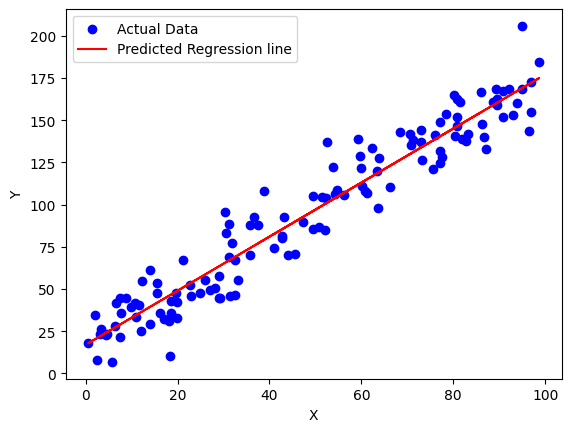

In [18]:
plt.scatter(X, y, color= 'blue', label= 'Actual Data')
plt.plot(X, y_pred, color='red', label= 'Predicted Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

**Prediction for new data**

In [17]:
pred= model.predict([[125]])
print(f"Predicted value of y: {pred[0]}")

Predicted value of y: 217.0643731853458


In [20]:
X_new= [[5], [15], [25]]
y_pred_mul= model.predict(X_new)

for x_val, y_val in zip([5, 15, 25], y_pred):
    print(f"{x_val} predicted value--->{y_val:.2f}")

5 predicted value--->76.91
15 predicted value--->169.15
25 predicted value--->134.13
